### Exploratory Data Analysis

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

#### Load CSV data as pandas datframe

In [2]:
df = pd.read_csv('Data/StudentsPerformance.csv')

#### Preview of dataset

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of dataset

In [4]:
df.shape

(1000, 8)

#### Checking for missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Checking for duplicate

In [6]:
df.duplicated().sum()

np.int64(0)

#### Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Unique values

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### Statistics of dataset

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Unique values of categorical columns

In [10]:
print(f'Categories in gender: {df['gender'].unique().tolist()}')

print(f'Categories in race/ethnicity: {df['race/ethnicity'].unique().tolist()}')

print(f'Categories in parental level of education: {df['parental level of education'].unique().tolist()}')

print(f'Categories in lunch: {df['lunch'].unique().tolist()}')

print(f'Categories in test preparation course: {df['test preparation course'].unique().tolist()}')

Categories in gender: ['female', 'male']
Categories in race/ethnicity: ['group B', 'group C', 'group A', 'group D', 'group E']
Categories in parental level of education: ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
Categories in lunch: ['standard', 'free/reduced']
Categories in test preparation course: ['none', 'completed']


#### Separating Numeric and Categorical columns

In [11]:
numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
categorical_cols = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col])]

print('Numeric Columns: ', numeric_cols)
print('Categorical Columns: ', categorical_cols)

Numeric Columns:  ['math score', 'reading score', 'writing score']
Categorical Columns:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### Adding columns for differents socres to calculate total and average scores

In [12]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score'] / 3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Saving the processed CSV

In [23]:
df.to_csv('Data/ProcessedStudentPerformance.csv')

#### Frontbencher and Backbencher

In [13]:
full_marks_in_maths = (df['math score'] == 100).sum()
least_marks_in_reading = (df['reading score'] == 100).sum()
full_marks_in_writing = (df['writing score'] == 100).sum()

print('Students with full maths score: ', full_marks_in_maths)
print('Students with full reading score: ', least_marks_in_reading)
print('Students with full writing score: ', full_marks_in_writing)

Students with full maths score:  7
Students with full reading score:  17
Students with full writing score:  14


In [14]:
least_marks_in_maths = (df['math score'] <= 20).sum()
least_marks_in_reading = (df['reading score'] <= 20).sum()
least_marks_in_writing = (df['writing score'] <= 20).sum()

print('Students with least_marks_in_maths maths score: ', least_marks_in_maths)
print('Students with least_marks_in_maths reading score: ', least_marks_in_reading)
print('Students with least_marks_in_maths writing score: ', least_marks_in_writing)

Students with least_marks_in_maths maths score:  4
Students with least_marks_in_maths reading score:  1
Students with least_marks_in_maths writing score:  3


### Data Visualization

#### Histogram

##### Total score

<Axes: xlabel='total score', ylabel='Count'>

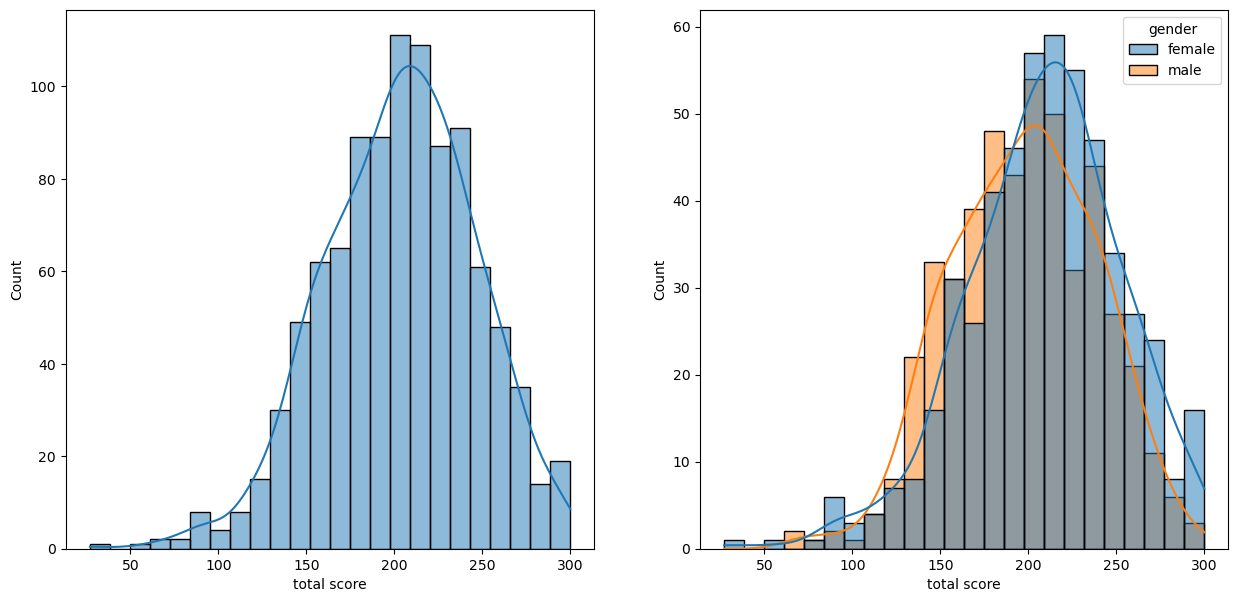

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'total score', kde = True)

plt.subplot(122)
sns.histplot(data = df, x = 'total score', hue = 'gender', kde = True)

##### Average score

<Axes: xlabel='average score', ylabel='Count'>

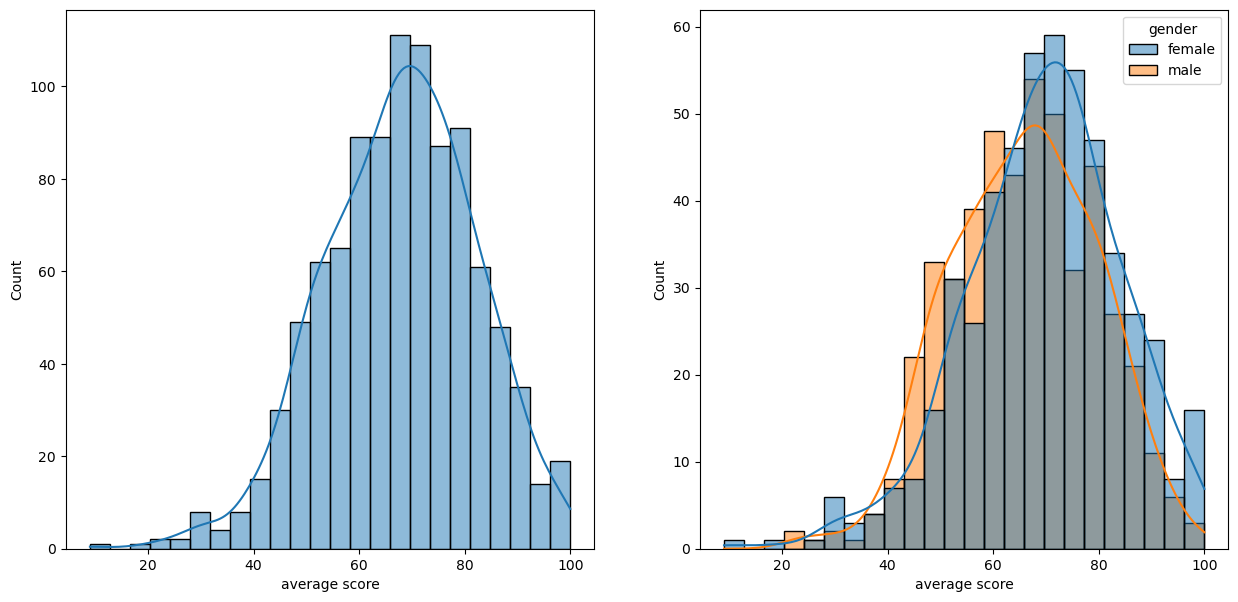

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'average score', kde = True)

plt.subplot(122)
sns.histplot(data = df, x = 'average score', hue = 'gender', kde = True)

##### Lunch

<Axes: xlabel='average score', ylabel='Count'>

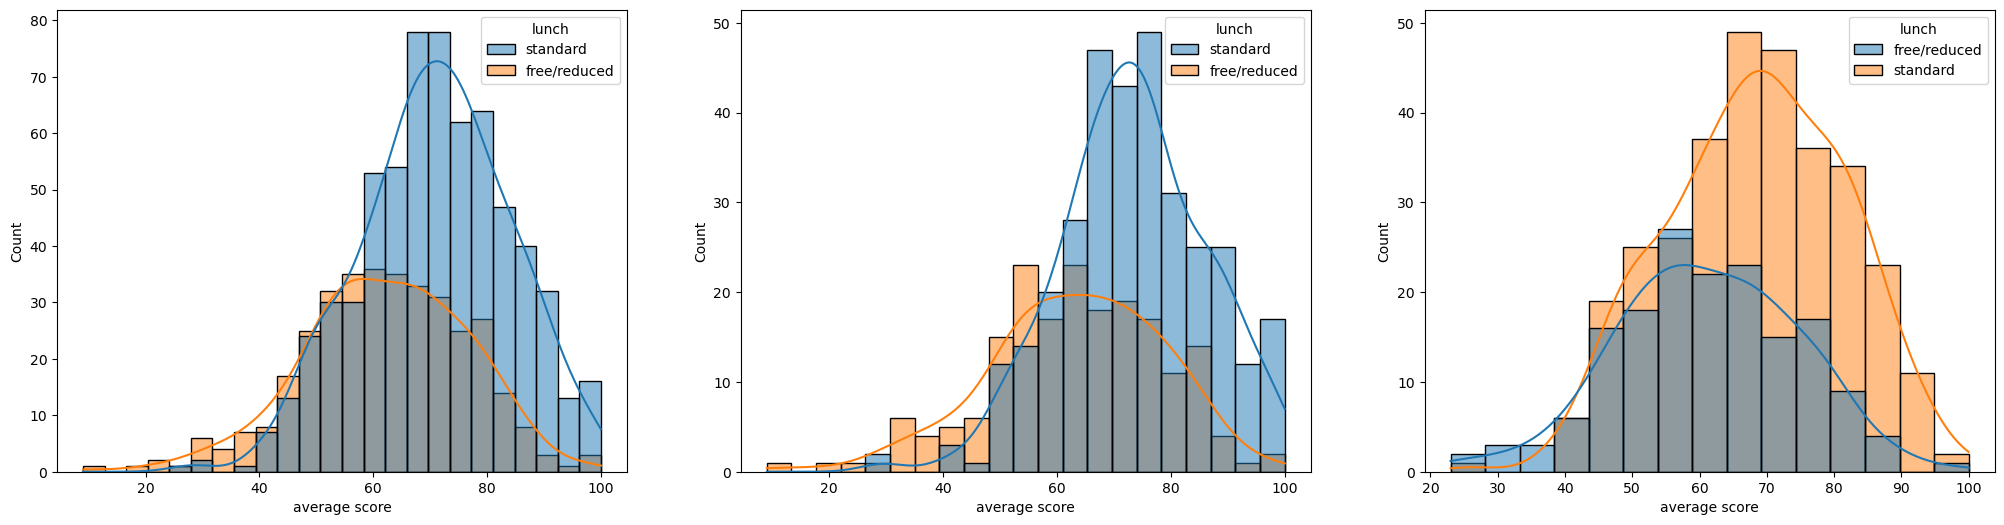

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(131)
sns.histplot(data = df, x = 'average score', kde = True, color = 'g', hue = 'lunch')

plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average score', kde = True, hue = 'lunch')

plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average score', kde = True, hue = 'lunch')  

##### Test preparation score

<Axes: xlabel='average score', ylabel='Count'>

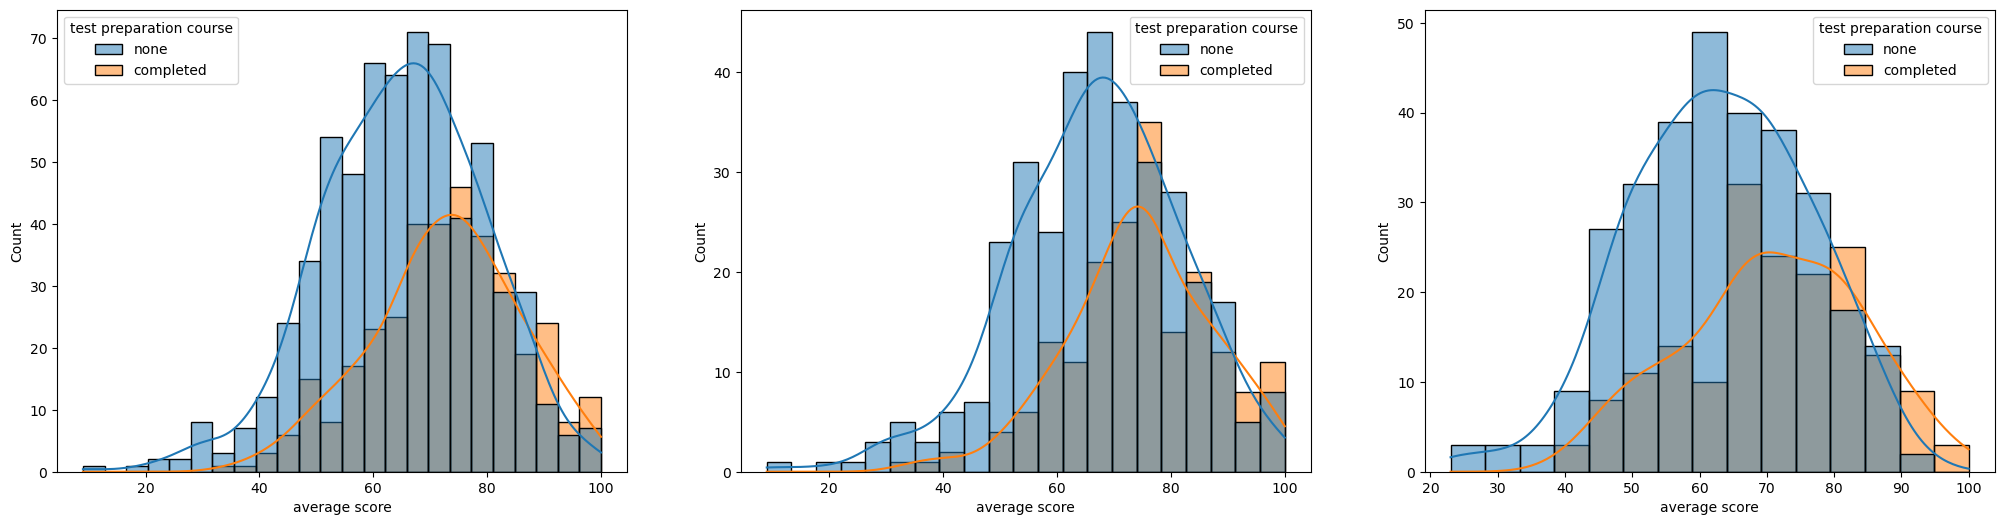

In [18]:
fig, axes = plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(131)
sns.histplot(data = df, x = 'average score', kde = True, color = 'g', hue = 'test preparation course')

plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average score', kde = True, hue = 'test preparation course')

plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average score', kde = True, hue = 'test preparation course') 

##### Parental level education

<Axes: xlabel='average score', ylabel='Count'>

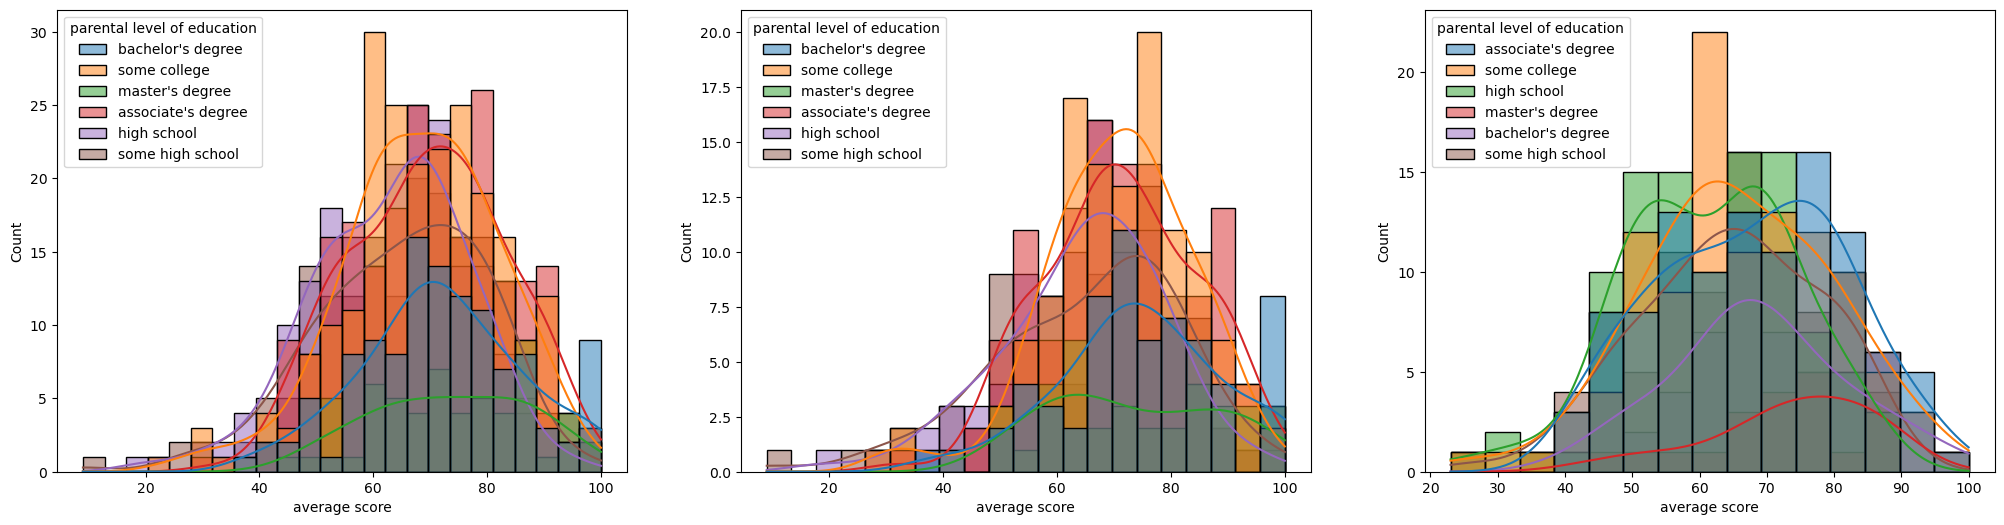

In [19]:
fig, axes = plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(131)
sns.histplot(data = df, x = 'average score', kde = True, color = 'g', hue = 'parental level of education')

plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average score', kde = True, hue = 'parental level of education')

plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average score', kde = True, hue = 'parental level of education') 

##### Race/Ethinicity

<Axes: xlabel='average score', ylabel='Count'>

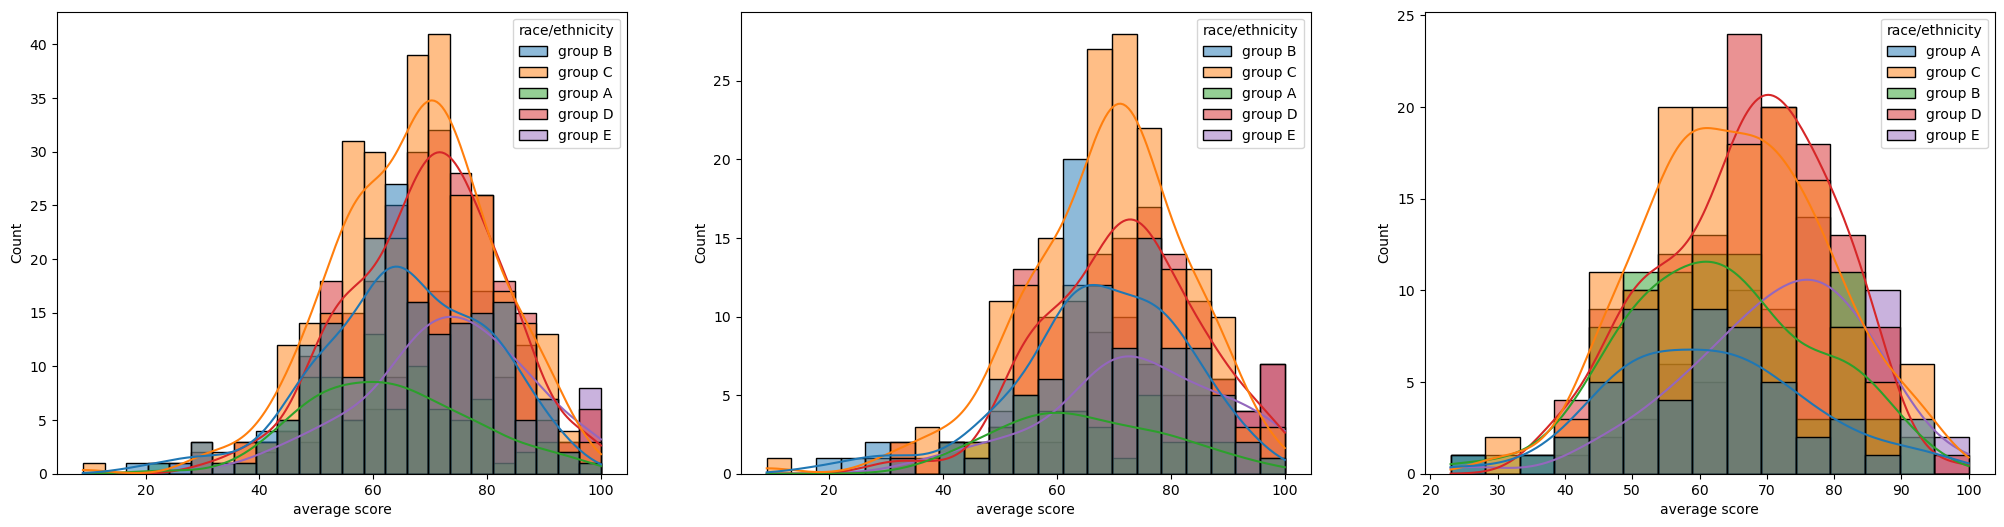

In [20]:
fig, axes = plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(131)
sns.histplot(data = df, x = 'average score', kde = True, color = 'g', hue = 'race/ethnicity')

plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average score', kde = True, hue = 'race/ethnicity')

plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average score', kde = True, hue = 'race/ethnicity') 

##### Highest scores in subjects

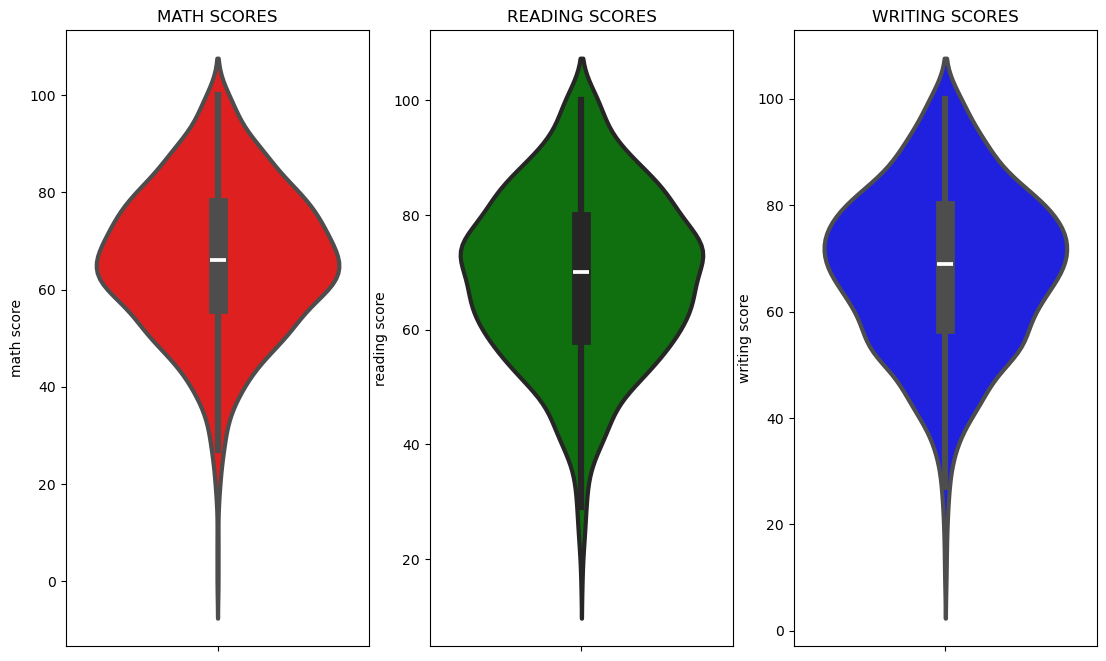

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Multi-Variety analysis using piechart

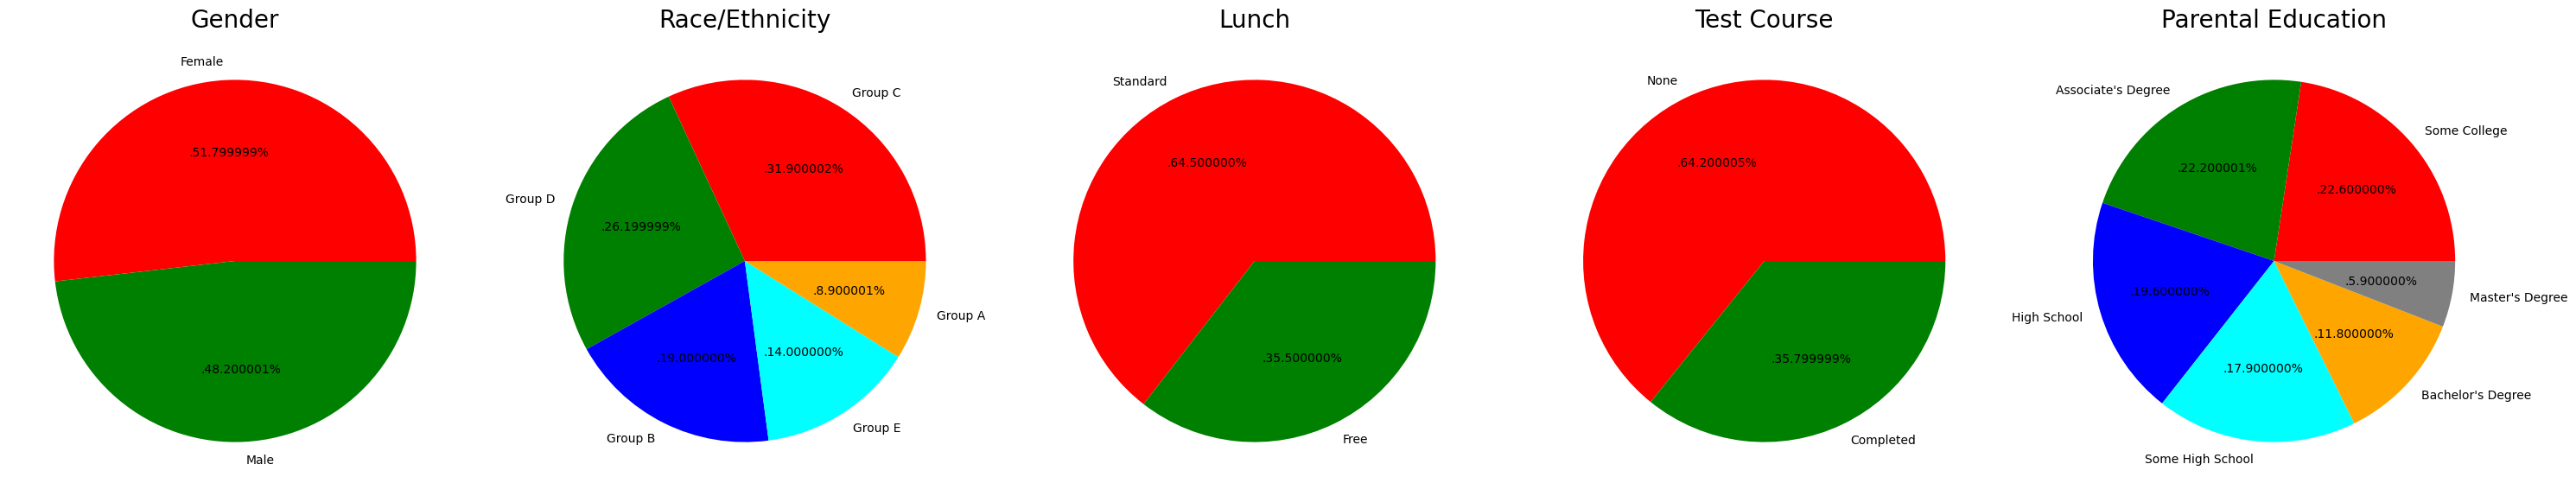

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()